## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# we should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

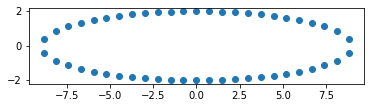

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [5]:
len(X),len(Y)

(50, 50)

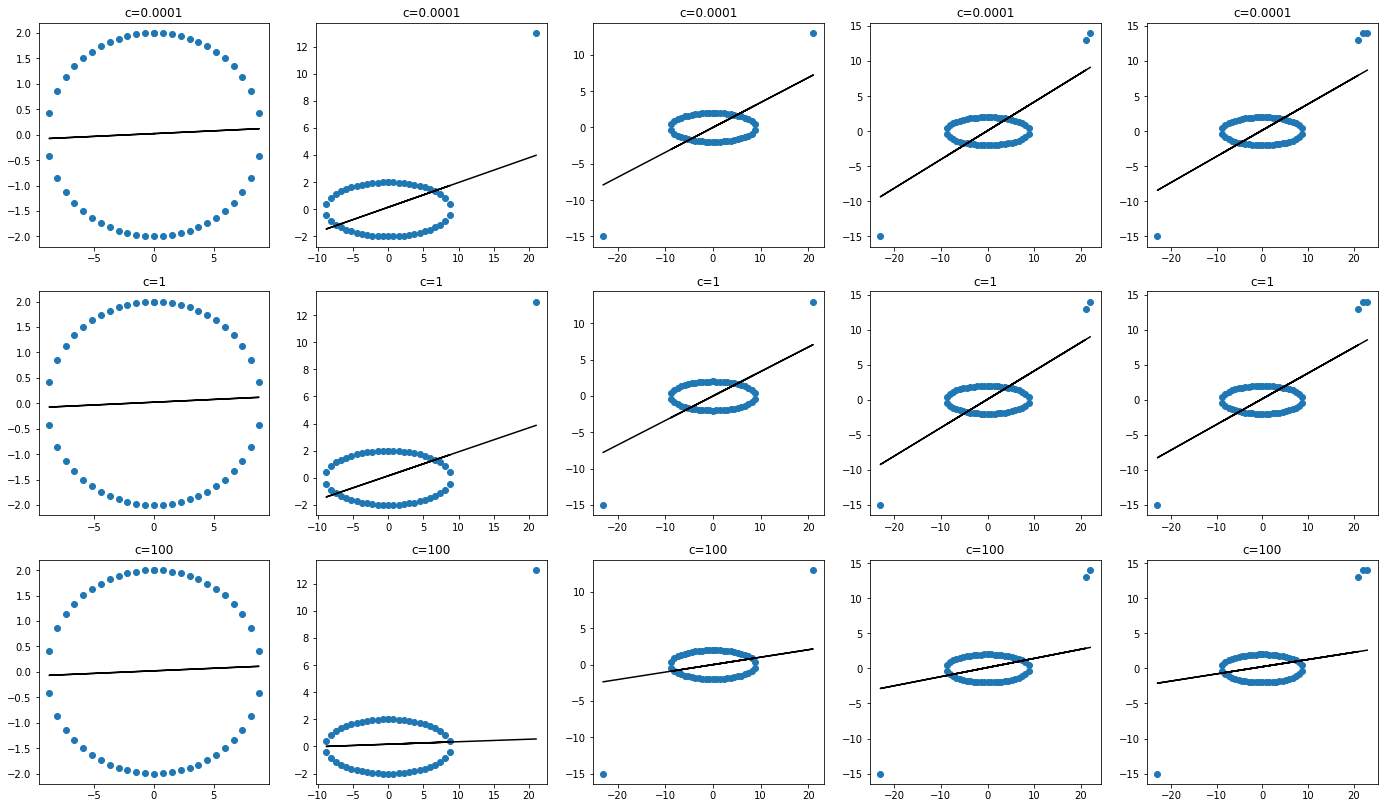

In [6]:
alpha=[0.0001, 1, 100]
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] 
k=1
plt.figure(figsize=(24,14))
for i in alpha:
    x = X
    y= Y
    for j in outliers:
        x = np.append(x,j[0]).reshape(-1,1)
        y = np.append(y,j[1]).reshape(-1,1)
        reg = SGDRegressor(alpha=i , eta0=0.001 ,learning_rate='constant',random_state=10)
        reg.fit(x,y)
        y_pred=reg.predict(x)
        plt.subplot(len(alpha),len(outliers),k)
        plt.title('c={}'.format(i))
        plt.scatter(x,y)
        plt.plot(x,y_pred,color='black')
        k+=1

***Observation***

1. As C (regularizer value alpha) increases the impact of outlier is reducing
2. As C is small it gives less importance to the regularizer hence it will overfit since it is overfiting it will be impacted by outlier points. This we can clearly able to see in the above plots
3. when C is large it gives more importance to the regularizer hence the model started to underfit hence it is not considering the outlier points